## 1

### (a)

#### Setting

In [1]:
import tensorflow as tf
import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Vanishing/Exploding Gradients Problem

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

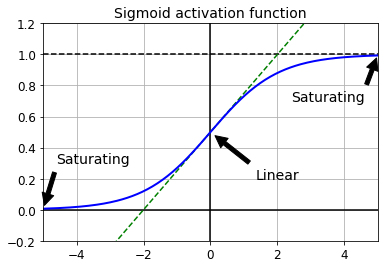

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

#### Xavier and He Initialization

In [4]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

#### Nonsaturating Activation Functions

Leaky Relu

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

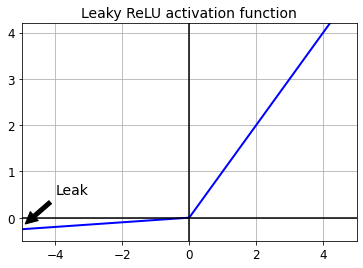

In [7]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['ELU',
 'LeakyReLU',
 'PReLU',
 'ReLU',
 'Softmax',
 'ThresholdedReLU',
 'activation_layers',
 'backend',
 'deserialize',
 'deserialize_keras_object',
 'elu',
 'exponential',
 'gelu',
 'get',
 'get_globals',
 'hard_sigmoid',
 'keras_export',
 'leaky_relu',
 'linear',
 'log_softmax',
 'prelu',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'serialize_keras_object',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh',
 'tf',
 'thresholded_relu']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

mnist using Leaky Relu

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 5ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy

mnist using PReLU

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5618 - accuracy: 0.8136 - val_loss: 0.5406 - val_accuracy: 0.8244
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5390 - accuracy: 0.8207 - val_loss: 0.5197 - val_accuracy:

#### ELU

In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

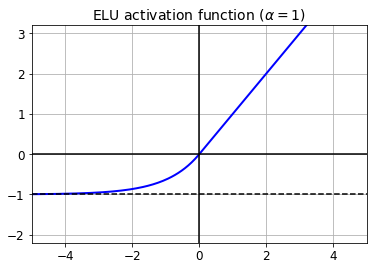

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [19]:
keras.layers.Dense(10, activation="elu")

#### SELU

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [23]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [24]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 24s 12ms/step - loss: 1.1625 - accuracy: 0.5499 - val_loss: 0.9437 - val_accuracy: 0.6524
Epoch 2/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.8210 - accuracy: 0.7065 - val_loss: 0.7209 - val_accuracy: 0.7506
Epoch 3/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.6995 - accuracy: 0.7487 - val_loss: 0.6662 - val_accuracy: 0.7504
Epoch 4/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.6042 - accuracy: 0.7761 - val_loss: 0.5765 - val_accuracy: 0.7906
Epoch 5/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.5981 - accuracy: 0.7805 - val_loss: 0.5173 - val_accuracy: 0.8094


In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 23s 12ms/step - loss: 1.9143 - accuracy: 0.2535 - val_loss: 2.1174 - val_accuracy: 0.2342
Epoch 2/5
1719/1719 [==============================] - 20s 11ms/step - loss: 1.3576 - accuracy: 0.4469 - val_loss: 1.0083 - val_accuracy: 0.5658
Epoch 3/5
1719/1719 [==============================] - 19s 11ms/step - loss: 1.0855 - accuracy: 0.5614 - val_loss: 0.8964 - val_accuracy: 0.6566
Epoch 4/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.8909 - accuracy: 0.6460 - val_loss: 0.8405 - val_accuracy: 0.6730
Epoch 5/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.9576 - accuracy: 0.6293 - val_loss: 0.7908 - val_accuracy: 0.6896


#### Batch Normalization

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_211 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_212 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8661 - accuracy: 0.7119 - val_loss: 0.5674 - val_accuracy: 0.8064
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5733 - accuracy: 0.8014 - val_loss: 0.4864 - val_accuracy: 0.8378
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5143 - accuracy: 0.8221 - val_loss: 0.4480 - val_accuracy: 0.8456
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4763 - accuracy: 0.8347 - val_loss: 0.4260 - val_accuracy: 0.8558
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4517 - accuracy: 0.8429 - val_loss: 0.4106 - val_accuracy: 0.8624
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4356 - accuracy: 0.8472 - val_loss: 0.3987 - val_accuracy: 0.8646
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4217 - accuracy: 0.8514 - val_loss: 0.3887 - val_accuracy:

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0569 - accuracy: 0.6798 - val_loss: 0.6812 - val_accuracy: 0.7876
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6827 - accuracy: 0.7813 - val_loss: 0.5585 - val_accuracy: 0.8230
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5990 - accuracy: 0.8015 - val_loss: 0.5022 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5466 - accuracy: 0.8161 - val_loss: 0.4672 - val_accuracy: 0.8442
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5139 - accuracy: 0.8248 - val_loss: 0.4439 - val_accuracy: 0.8530
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4916 - accuracy: 0.8308 - val_loss: 0.4264 - val_accuracy: 0.8594
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4738 - accuracy: 0.8375 - val_loss: 0.4135 - val_accuracy:

#### Gradient Clipping

In [35]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [36]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

#### Reusing Pretrained Layers

Reusing a Keras model

In [37]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [38]:
tf.random.set_seed(42)
np.random.seed(42)

In [39]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [40]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [41]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3893 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8785 - val_loss: 0.3289 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3013 - val_accuracy: 0.8994
Epoch 4/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2894 - val_accuracy: 0.9023
Epoch 5/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9023 - val_loss: 0.2775 - val_accuracy: 0.9068
Epoch 6/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9062 - val_loss: 0.2734 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2717 - val_accuracy:

In [42]:
model_A.save("my_model_A.h5")

In [43]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [44]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [45]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 30ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [46]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_223 (Dense)           (None, 300)               235500    
                                                                 
 dense_224 (Dense)           (None, 100)               30100     
                                                                 
 dense_225 (Dense)           (None, 50)                5050      
                                                                 
 dense_226 (Dense)           (None, 50)                2550      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 1)                

In [47]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [48]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [49]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [50]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 41ms/step - loss: 0.2658 - accuracy: 0.9400 - val_loss: 0.2802 - val_accuracy: 0.9260
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2561 - accuracy: 0.9400 - val_loss: 0.2706 - val_accuracy: 0.9290
Epoch 3/4
7/7 [==============================] - 0s 29ms/step - loss: 0.2467 - accuracy: 0.9400 - val_loss: 0.2618 - val_accuracy: 0.9331
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2381 - accuracy: 0.9400 - val_loss: 0.2536 - val_accuracy: 0.9371
Epoch 1/16
7/7 [==============================] - 1s 51ms/step - loss: 0.2130 - accuracy: 0.9450 - val_loss: 0.2051 - val_accuracy: 0.9645
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.1702 - accuracy: 0.9550 - val_loss: 0.1724 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.1410 - accuracy: 0.9650 - val_loss: 0.1496 - val_accuracy: 0.9817
Epoch 4/16
7/7 [===============

In [51]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [52]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9940


[0.05638745427131653, 0.9940000176429749]

#### Faster Optimizers

Momentum optimization


In [53]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

Nesterov Accelerated Gradient

In [54]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

AdaGrad

In [55]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

RMSProp

In [56]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

Adam Optimization

In [57]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Adamax Optimization

In [58]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Nadam Optimization


In [59]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Learning Rate Scheduling

Power Scheduling  
lr = lr0 / (1 + steps / s)**c
* Keras uses c=1 and s = 1 / decay

In [60]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [61]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [62]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4898 - accuracy: 0.8265 - val_loss: 0.4063 - val_accuracy: 0.8612
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8651 - val_loss: 0.3730 - val_accuracy: 0.8720
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3467 - accuracy: 0.8776 - val_loss: 0.3746 - val_accuracy: 0.8722
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3258 - accuracy: 0.8844 - val_loss: 0.3510 - val_accuracy: 0.8782
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3107 - accuracy: 0.8897 - val_loss: 0.3446 - val_accuracy: 0.8786
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8939 - val_loss: 0.3417 - val_accuracy: 0.8832
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.3380 - val_accuracy:

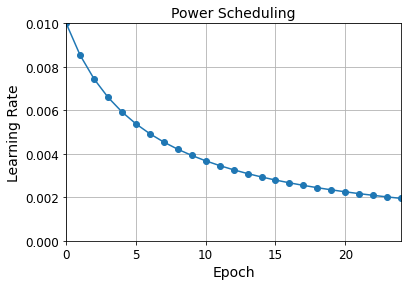

In [63]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling
* lr = lr0 * 0.1**(epoch / s)

In [64]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [65]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [66]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [67]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8553 - accuracy: 0.7520 - val_loss: 0.8148 - val_accuracy: 0.7606 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6708 - accuracy: 0.7975 - val_loss: 0.6270 - val_accuracy: 0.8050 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5758 - accuracy: 0.8210 - val_loss: 0.7486 - val_accuracy: 0.7726 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5436 - accuracy: 0.8319 - val_loss: 0.4777 - val_accuracy: 0.8560 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4844 - accuracy: 0.8470 - val_loss: 0.4761 - val_accuracy: 0.8704 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4440 - accuracy: 0.8593 - val_loss: 0.6010 - val_accuracy: 0.8604 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 7s

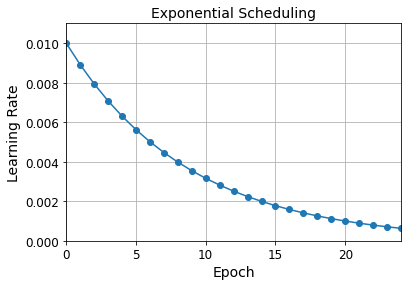

In [68]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Piecewise Constant Scheduling

In [69]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [70]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [71]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8518 - accuracy: 0.7528 - val_loss: 0.7129 - val_accuracy: 0.7844 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0037 - accuracy: 0.7125 - val_loss: 0.9174 - val_accuracy: 0.7168 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8957 - accuracy: 0.7384 - val_loss: 1.6954 - val_accuracy: 0.5642 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9322 - accuracy: 0.7350 - val_loss: 0.9863 - val_accuracy: 0.6976 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9484 - accuracy: 0.6927 - val_loss: 1.0165 - val_accuracy: 0.6294 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7267 - accuracy: 0.7340 - val_loss: 0.7322 - val_accuracy: 0.7462 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 7s

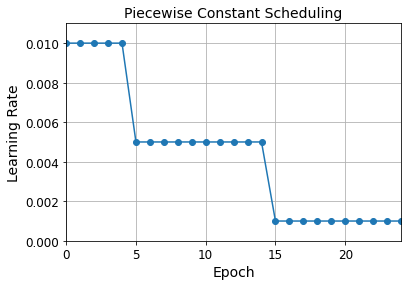

In [72]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Performance Scheduling

In [73]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6019 - accuracy: 0.8048 - val_loss: 0.5087 - val_accuracy: 0.8430 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8390 - val_loss: 0.6403 - val_accuracy: 0.8320 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5030 - accuracy: 0.8431 - val_loss: 0.5194 - val_accuracy: 0.8656 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5114 - accuracy: 0.8468 - val_loss: 0.4794 - val_accuracy: 0.8572 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5132 - accuracy: 0.8495 - val_loss: 0.5586 - val_accuracy: 0.8530 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4960 - accuracy: 0.8538 - val_loss: 0.5337 - val_accuracy: 0.8576 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 5s

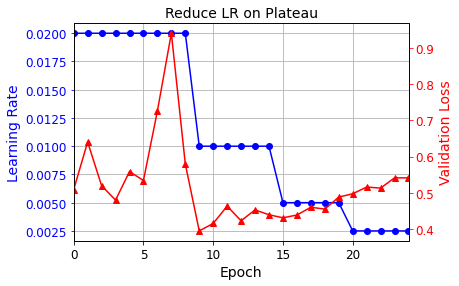

In [74]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### (b)

a

In [75]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

b

In [76]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [77]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [78]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 6s 0us/step


In [79]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [80]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 17s 10ms/step - loss: 3.9957 - accuracy: 0.1616 - val_loss: 2.1968 - val_accuracy: 0.2174
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0816 - accuracy: 0.2422 - val_loss: 2.1323 - val_accuracy: 0.2338
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9570 - accuracy: 0.2834 - val_loss: 2.1182 - val_accuracy: 0.2330
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8650 - accuracy: 0.3224 - val_loss: 1.8796 - val_accuracy: 0.3312
Epoch 5/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.7973 - accuracy: 0.3447 - val_loss: 1.8207 - val_accuracy: 0.3326
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7407 - accuracy: 0.3687 - val_loss: 1.7318 - val_accuracy: 0.3788
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6948 - accuracy: 0.3878 - val_loss: 1

In [81]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5250 - accuracy: 0.4616


[1.5249661207199097, 0.46160000562667847]

c

In [82]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 49s 29ms/step - loss: 1.8412 - accuracy: 0.3395 - val_loss: 1.7566 - val_accuracy: 0.3660
Epoch 2/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.6649 - accuracy: 0.4074 - val_loss: 1.6292 - val_accuracy: 0.4238
Epoch 3/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5942 - accuracy: 0.4330 - val_loss: 1.5355 - val_accuracy: 0.4478
Epoch 4/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5472 - accuracy: 0.4508 - val_loss: 1.5073 - val_accuracy: 0.4614
Epoch 5/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.5020 - accuracy: 0.4659 - val_loss: 1.4456 - val_accuracy: 0.4826
Epoch 6/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.4645 - accuracy: 0.4796 - val_loss: 1.4171 - val_accuracy: 0.4908
Epoch 7/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.4302 - accuracy: 0.4922 - val_loss: 1

[1.3095154762268066, 0.5473999977111816]

d

In [83]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 18s 11ms/step - loss: 1.9153 - accuracy: 0.3133 - val_loss: 1.8407 - val_accuracy: 0.3392
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6941 - accuracy: 0.3969 - val_loss: 1.7426 - val_accuracy: 0.3652
Epoch 3/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.6042 - accuracy: 0.4332 - val_loss: 1.7428 - val_accuracy: 0.3978
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5392 - accuracy: 0.4573 - val_loss: 1.6164 - val_accuracy: 0.4246
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4850 - accuracy: 0.4777 - val_loss: 1.5756 - val_accuracy: 0.4512
Epoch 6/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4363 - accuracy: 0.4974 - val_loss: 1.5135 - val_accuracy: 0.4730
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3943 - accuracy: 0.5135 - val_loss: 1

[1.4604148864746094, 0.4875999987125397]

In [84]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.4604 - accuracy: 0.4876


[1.4604148864746094, 0.4875999987125397]

e

In [85]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 19s 11ms/step - loss: 1.8747 - accuracy: 0.3352 - val_loss: 1.7275 - val_accuracy: 0.3862
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6471 - accuracy: 0.4212 - val_loss: 1.6296 - val_accuracy: 0.4218
Epoch 3/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.5659 - accuracy: 0.4508 - val_loss: 1.6299 - val_accuracy: 0.4180
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4936 - accuracy: 0.4742 - val_loss: 1.6241 - val_accuracy: 0.4576
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4432 - accuracy: 0.4939 - val_loss: 1.5994 - val_accuracy: 0.4584
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3954 - accuracy: 0.5093 - val_loss: 1.5199 - val_accuracy: 0.4714
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3506 - accuracy: 0.5272 - val_loss: 1

[1.5118393898010254, 0.49160000681877136]

In [86]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [87]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [88]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [89]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

157/157 [==============================] - 0s 2ms/step


0.4908

In [90]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

### (C)

## 2

### setting

In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

### import and Simple EDA

In [93]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [94]:
# 550068개의 소비내역이 존재한다
print(train.shape)

(550068, 12)


In [95]:
# Product_Category_2 와 3에만 결측치가 존재
print(train.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [96]:
# 결측치들은 Product 카테고리가 존재하지 않는 것이므로 0으로 채워주기로 함.
# 편의를 위해 Product_Category_2 와 Product_Category_3의 dtype을 int로 변경
train = train.fillna(0)
train = train.astype({'Product_Category_2': 'int'})
train = train.astype({'Product_Category_3': 'int'})

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


#### User_ID

In [98]:
# User_ID는 사용자의 ID를 나타내고, 총 5891개의 값이 존재함
# 즉 5891명의 사용자가 550068개의 물건을 구매한 것
train['User_ID'].nunique()

5891

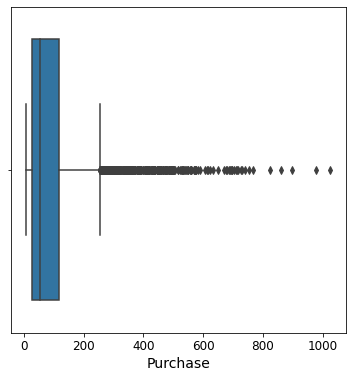

In [99]:
# 개인 별 구매량의 분포를 간단하게 살펴보면 다음과 같다
purchase_amount = train.groupby('User_ID').count()['Purchase']
plt.figure(figsize=(6,6))
sns.boxplot(purchase_amount)

#### Product_ID

In [100]:
# Product_ID는 제품의 ID를 나타내고, 총 3631개의 값이 존재함
# 즉 3631개의 제품이 존재함
train['Product_ID'].nunique()

3631

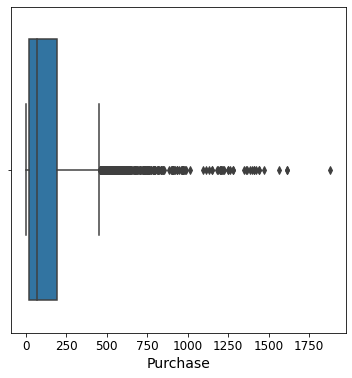

In [101]:
# 각각의 상품별로 판매량(판매금액 아님)을 알아보면 다음과 같다
purchase_amount = train.groupby('Product_ID').count()['Purchase']
plt.figure(figsize=(6,6))
sns.boxplot(purchase_amount)

#### Gender

In [102]:
train['Gender'].nunique()

2

In [103]:
# 구매 횟수는 남성이 여성에 비해 많은 것을 확인할 수 있다
train.groupby('Gender').count()['Purchase']

Gender
F    135809
M    414259
Name: Purchase, dtype: int64

In [104]:
# 구매량도 마찬가지이다.
train.groupby("Gender").sum()['Purchase']

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

#### Age

In [105]:
print("Unique한 값들의 개수: ", train['Age'].nunique())
print("Unique한 값들: ", train['Age'].unique())

Unique한 값들의 개수:  7
Unique한 값들:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


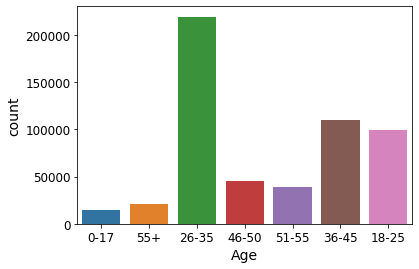

In [106]:
# 구매 횟수는 26~35세가 다른 연령 층에 비해 압도적으로 높고, 그 나이대로 부터 멀어질 수로 구매량이 줄어드는 것을 확인할 수 있다.
sns.countplot(train['Age'])
print(train['Age'].value_counts())

#### Occupation

In [107]:
print("Unique한 값들의 개수: ", train['Occupation'].nunique())
print("Unique한 값들: ", train['Occupation'].unique())

Unique한 값들의 개수:  21
Unique한 값들:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


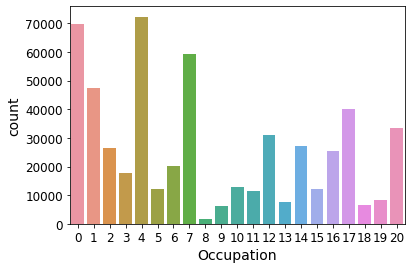

In [108]:
# 각각의 직업 별로 그 수가 상당히 다름을 알 수 있다
sns.countplot(train['Occupation'])

#### City_Category

In [109]:
print("Unique한 값들의 개수: ", train['City_Category'].nunique())
print("Unique한 값들: ", train['City_Category'].unique())

Unique한 값들의 개수:  3
Unique한 값들:  ['A' 'C' 'B']


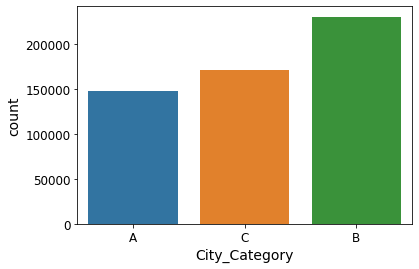

In [110]:
# 약간 차이가 나기는 하지만 전체적으로 비슷함을 알 수 있다
sns.countplot(train['City_Category'])

<BarContainer object of 3 artists>

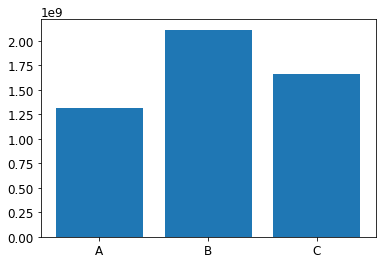

In [111]:
# 대략적으로 보았을 때 도시마다 구매력의 차이가 있다고 보기는 어려울 것 같다
data = train.groupby('City_Category').sum()['Purchase']
plt.bar(x=['A','B', 'C'], height=data)

#### Stay_In_Current_City_Years	

In [112]:
print("Unique한 값들의 개수: ", train['Stay_In_Current_City_Years'].nunique())
print("Unique한 값들: ", train['Stay_In_Current_City_Years'].unique())

Unique한 값들의 개수:  5
Unique한 값들:  ['2' '4+' '3' '1' '0']


#### Marital_Status

In [113]:
print("Unique한 값들의 개수: ", train['Marital_Status'].nunique())
print("Unique한 값들: ", train['Marital_Status'].unique())

Unique한 값들의 개수:  2
Unique한 값들:  [0 1]


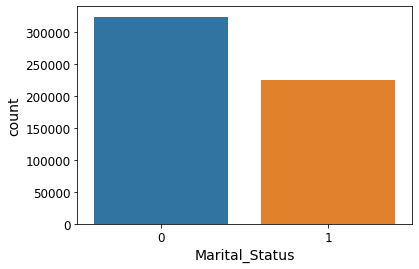

In [114]:
# 0이 1에 비해 더 많다
sns.countplot(train['Marital_Status'])

<BarContainer object of 2 artists>

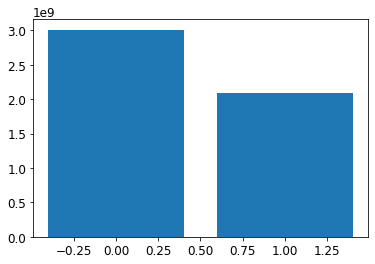

In [115]:
# 구매력은 크게 차이가 나지는 않는 것 같다
data = train.groupby('Marital_Status').sum()['Purchase']
plt.bar(x=[0, 1], height=data)

#### Product_Category_1	

In [116]:
print("Unique한 값들의 개수: ", train['Product_Category_1'].nunique())
print("Unique한 값들: ", train['Product_Category_1'].unique())

Unique한 값들의 개수:  20
Unique한 값들:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


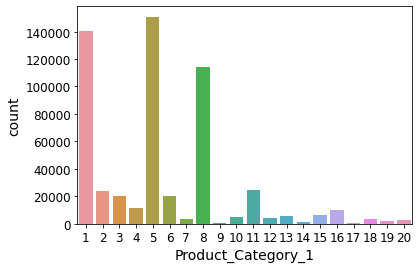

In [117]:
# 판매량이 그룹별로 상당히 심한 차이를 보이고 있음을 알 수 있다
sns.countplot(train['Product_Category_1'])

<BarContainer object of 20 artists>

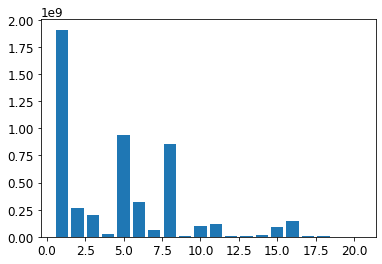

In [118]:
# 전체적으로 비슷하지만 5번과 같이 판매량과 판매금액이 차이가 많이 나보이는 제품들도 일부 존재한다.
data = train.groupby('Product_Category_1').sum()['Purchase']
plt.bar(x=[x for x in range(1, 21)], height=data)

### Define Problem

User별 Purchase 금액의 합계를 예측하려고 함 이 때, Product ID 및 Purchase카테고리는 사용하지 않음

In [119]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [120]:
target = pd.Series(train.groupby("User_ID").sum()['Purchase'])

In [121]:
train = train.drop(['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [122]:
train = train.drop_duplicates(subset=['User_ID']).reset_index(drop=True).set_index('User_ID')

In [123]:
train['Purchase'] = target

In [124]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,334093
1000002,M,55+,16,C,4+,0,810472
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,206468
1000005,M,26-35,20,A,1,1,821001


In [125]:
# occupation도 onehot인코딩을 해주기 위해서
df = train.astype({'Occupation': 'str'})

In [126]:
df = pd.get_dummies(df)

In [127]:
X = df.drop('Purchase', axis=1)
y = df[['Purchase']]

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.shape

(4712, 39)

In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

### Using deep learning

#### Model1

In [131]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model1 = Sequential()
model1.add(Dense(1000, input_shape=(39, ), activation='relu', name='dense1'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2, name='dropout1'))
model1.add(Dense(200, activation='relu', name='dense2'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2, name='dropout2'))
model1.add(Dense(50, activation='relu', name='dense3'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2, name='dropout3'))
model1.add(Dense(10, activation='relu', name='dense4'))
model1.add(Dense(1, name='output'))

In [132]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 1000)              40000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dropout1 (Dropout)          (None, 1000)              0         
                                                                 
 dense2 (Dense)              (None, 200)               200200    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout2 (Dropout)          (None, 200)               0

In [133]:
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model1.compile(loss='mse', optimizer= optimizer)

In [134]:
model1.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 0.9867
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8171
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.7236
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6608
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5994
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5710
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5493
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5124
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4959
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4468
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4391
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4249
Epoch 13/100
5/5 [==============================] - 0s 6ms/st

In [135]:
from sklearn.metrics import mean_squared_error
model1.evaluate(X_test ,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.0355


0.03552350774407387

In [136]:
from sklearn.metrics import mean_squared_error
y_pred = y_scaler.inverse_transform(model1.predict(X_test))
actual_y_test = y_scaler.inverse_transform(y_test)
print("MSE: ", mean_squared_error(y_pred, actual_y_test))
print("RMSE: ", mean_squared_error(y_pred, actual_y_test) ** 0.5)

37/37 [==============================] - 0s 2ms/step
MSE:  3909180134716.7534
RMSE:  1977164.6706121252


#### Model2

전처리 방식의 변화

In [137]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,334093
1000002,M,55+,16,C,4+,0,810472
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,206468
1000005,M,26-35,20,A,1,1,821001


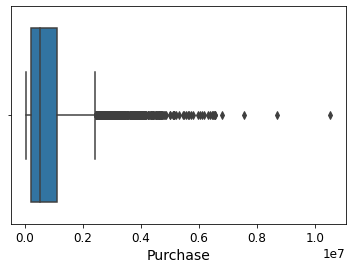

In [138]:
sns.boxplot(train.Purchase)

In [139]:
df = train.copy()
def mapping_col(col, map_class):
  df[[col]] = df[[col]].applymap(map_class.get)

In [140]:
mapping_col('Gender', {'M':0, 'F':1})
mapping_col("Age", {'0-17':0, '18-25':1, '26-35':2, '36-45':3,
                    '46-50':4, '51-55':5, '55+':6})
mapping_col('Stay_In_Current_City_Years', {'0':0, '1':1, '2':2, '3':3, '4+':4})
mapping_col('City_Category', {'A':0, 'B':1, 'C':2})

In [141]:
X = df.drop('Purchase', axis=1)
y = df[['Purchase']]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

In [144]:
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

model2

In [145]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2 = Sequential()
model2.add(Dense(500, input_shape=(6, ), activation='elu', name='dense1'))
model2.add(Dropout(0.2, name='dropout1'))
model2.add(Dense(100, activation='elu', name='dense2'))
model2.add(Dropout(0.2, name='dropout2'))
model2.add(Dense(20, activation='elu', name='dense3'))
model2.add(Dense(1, activation='sigmoid', name='output'))

In [146]:
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model2.compile(loss='mse', optimizer= optimizer)

In [147]:
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 0.0257
Epoch 2/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 3/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 4/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 5/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 6/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 7/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 8/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 9/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 10/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 11/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 12/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 13/100


In [148]:
from sklearn.metrics import mean_squared_error
model2.evaluate(X_test ,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.0064


0.006391619797796011

In [149]:
from sklearn.metrics import mean_squared_error
y_pred = y_scaler.inverse_transform(model2.predict(X_test))
actual_y_test = y_scaler.inverse_transform(y_test)
print("MSE: ", mean_squared_error(y_pred, actual_y_test))
print("RMSE: ", mean_squared_error(y_pred, actual_y_test) ** 0.5)

37/37 [==============================] - 0s 2ms/step
MSE:  703365059487.6263
RMSE:  838668.6231686663


### model3

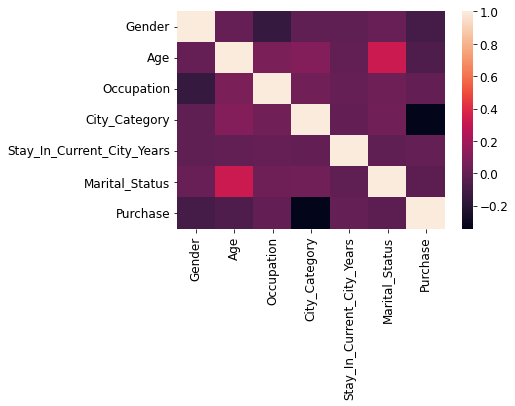

In [150]:
sns.heatmap(df.corr())

In [151]:
# 원핫 인코딩을 해준 경우
df1 = train.astype({'Occupation': 'str'})

In [152]:
df1 = pd.get_dummies(df1)

In [153]:
# city_category, gender, age등이 중요하게 영향을 미치는 것을 확인할 수 있다
# 직업은 영향이 크다고 보기는 어려울 것 같고, stay_in_current_city_years, marital_status는 제외시켜도 될 것 같다
print(abs(df1.corr()['Purchase']).sort_values(ascending=False).head(10))
print(abs(df1.corr()['Purchase']).sort_values(ascending=False).tail(10))

Purchase           1.000000
City_Category_C    0.379149
City_Category_B    0.253386
City_Category_A    0.194282
Gender_F           0.101817
Gender_M           0.101817
Age_26-35          0.096613
Age_55+            0.089512
Occupation_13      0.058091
Occupation_20      0.051706
Name: Purchase, dtype: float64
Stay_In_Current_City_Years_0     0.008096
Age_36-45                        0.007717
Age_18-25                        0.005067
Occupation_11                    0.004899
Occupation_18                    0.004692
Stay_In_Current_City_Years_1     0.004346
Occupation_14                    0.004246
Occupation_15                    0.002530
Stay_In_Current_City_Years_4+    0.000207
Occupation_8                     0.000108
Name: Purchase, dtype: float64


In [154]:
df = train[['Gender', 'Age', 'City_Category', 'Purchase']]
df = pd.get_dummies(df, ['Gender', 'Age', 'City_Category'])

In [155]:
df = df.drop(['Gender_F', 'Age_55+', 'City_Category_C'], axis=1)

In [156]:
df.head()

,Purchase,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,City_Category_A,City_Category_B
User_ID,,,,,,,,,,
1000001,334093,0,1,0,0,0,0,0,1,0
1000002,810472,1,0,0,0,0,0,0,0,0
1000003,341635,1,0,0,1,0,0,0,1,0
1000004,206468,1,0,0,0,0,1,0,0,1
1000005,821001,1,0,0,1,0,0,0,1,0


In [157]:
X = df.drop('Purchase', axis=1)
y = df[['Purchase']]

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
X_train.shape

(4712, 9)

In [160]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [161]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

In [162]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = Sequential()
model3.add(Dense(500, input_shape=(9, ), activation='relu', name='dense1'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2, name='dropout1'))
model3.add(Dense(50, activation='relu', name='dense2'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2, name='dropout2'))
model3.add(Dense(10, activation='relu', name='dense3'))
model3.add(Dense(1, activation='sigmoid', name='output'))

In [163]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 500)               5000      
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dropout1 (Dropout)          (None, 500)               0         
                                                                 
 dense2 (Dense)              (None, 50)                25050     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout2 (Dropout)          (None, 50)                0

In [164]:
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model3.compile(loss='mse', optimizer= optimizer)

In [165]:
model3.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
5/5 [==============================] - 1s 9ms/step - loss: 0.2460
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2289
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2142
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2009
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1847
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1728
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1638
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1512
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1453
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1368
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1259
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 13/100
5/5 [==============================] - 0s 5ms/st

In [166]:
from sklearn.metrics import mean_squared_error
model3.evaluate(X_test ,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.0313


0.03134939819574356

In [167]:
from sklearn.metrics import mean_squared_error
y_pred = y_scaler.inverse_transform(model3.predict(X_test))
actual_y_test = y_scaler.inverse_transform(y_test)
print("MSE: ", mean_squared_error(y_pred, actual_y_test))
print("RMSE: ", mean_squared_error(y_pred, actual_y_test) ** 0.5)

37/37 [==============================] - 0s 2ms/step
MSE:  3449840596405.191
RMSE:  1857374.6515997227


## 3